In [14]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
from xgboost import XGBClassifier

In [23]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
file_path = "./SuperP_Group_Current_Working_Dataset.csv"

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head()

,Unnamed: 0,FIPS Code,"County, State",Population,Deaths,Crude Rate,Median Household Income ($),% <High School,% High School,% Associate,...,% White,% Black,% Native American,% Asian,% Pacific Islander,% Other,% Two or More Races,"Estimated Diabetes Rate Per 1,000",% Daily Smokers,% Population Obese
0,0,1001,"Autauga County, AL",144568.0,188.0,130.0,53748,12.4,34.3,28.7,...,76.860615,18.521681,0.410543,0.806554,0.056313,1.387854,1.956439,13.2,18.41,37.5
1,1,1003,"Baldwin County, AL",514161.0,581.0,113.0,50976,10.0,28.7,31.8,...,86.432259,9.319834,0.679164,0.670643,0.000000,0.885169,2.012932,9.3,16.02,31.0
2,2,1005,"Barbour County, AL",71488.0,118.0,165.1,32111,26.2,34.9,26.0,...,46.704742,47.929661,0.172841,0.484707,0.000000,4.129406,0.578643,16.5,18.73,44.3
3,3,1007,"Bibb County, AL",62810.0,123.0,195.8,40113,19.3,41.8,26.9,...,76.953748,21.212121,0.358852,0.062024,0.000000,0.035442,1.377813,13.7,22.62,37.8
4,4,1009,"Blount County, AL",148438.0,194.0,130.7,46377,20.0,32.9,34.0,...,95.440524,1.568349,0.348329,0.159434,0.000000,0.868224,1.615139,12.6,19.88,34.4


In [6]:
df.columns

Index(['Unnamed: 0', 'FIPS Code', 'County, State', 'Population', 'Deaths',
       'Crude Rate', 'Median Household Income ($)', '% <High School',
       '% High School', '% Associate', '% >Bachelor', 'MYS', 'Education Level',
       'Income Level', 'State', 'County_y', 'Population Total', '% White',
       '% Black', '% Native American', '% Asian', '% Pacific Islander',
       '% Other', '% Two or More Races', 'Estimated Diabetes Rate Per 1,000',
       '% Daily Smokers', '% Population Obese'],
      dtype='object')

In [7]:
df_numeric = df.drop(['County, State', 'Unnamed: 0', 'FIPS Code'], axis = 1)

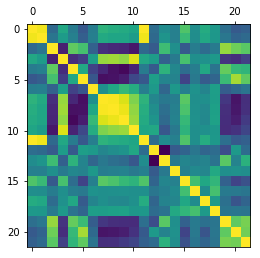

In [8]:
plt.matshow(df_numeric.corr())

In [9]:
df_numeric.columns

Index(['Population', 'Deaths', 'Crude Rate', 'Median Household Income ($)',
       '% <High School', '% High School', '% Associate', '% >Bachelor', 'MYS',
       'Education Level', 'Income Level', 'State', 'County_y',
       'Population Total', '% White', '% Black', '% Native American',
       '% Asian', '% Pacific Islander', '% Other', '% Two or More Races',
       'Estimated Diabetes Rate Per 1,000', '% Daily Smokers',
       '% Population Obese'],
      dtype='object')

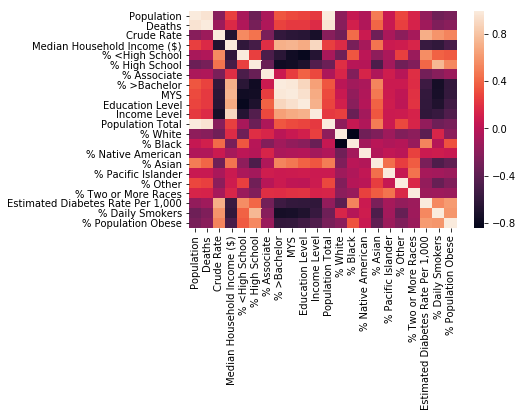

In [11]:
corr = df_numeric.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [13]:
#rs = np.random.RandomState(0)
#df = pd.DataFrame(rs.rand(10, 10))
corr = df_numeric.corr()
corr.style.background_gradient()

,Population,Deaths,Crude Rate,Median Household Income ($),% <High School,% High School,% Associate,% >Bachelor,MYS,Education Level,Income Level,Population Total,% White,% Black,% Native American,% Asian,% Pacific Islander,% Other,% Two or More Races,"Estimated Diabetes Rate Per 1,000",% Daily Smokers,% Population Obese
Population,1,0.958577,-0.211479,0.262086,-0.0746022,-0.336127,-0.0600008,0.344232,0.305129,0.280607,0.237645,0.999235,-0.188489,0.0543117,-0.0417333,0.493672,0.0690861,0.290108,0.14018,-0.172424,-0.323082,-0.282485
Deaths,0.958577,1,-0.130321,0.170605,-0.0415418,-0.284573,-0.0458071,0.273858,0.240295,0.240991,0.173065,0.960767,-0.215488,0.108122,-0.0425454,0.403643,0.0601177,0.26236,0.129612,-0.111453,-0.248297,-0.206092
Crude Rate,-0.211479,-0.130321,1,-0.681013,0.552092,0.458904,-0.27165,-0.593648,-0.633761,-0.645736,-0.727448,-0.213623,-0.313248,0.42624,0.0750988,-0.325317,-0.0730101,-0.189706,-0.0871527,0.705989,0.594476,0.524715
Median Household Income ($),0.262086,0.170605,-0.681013,1,-0.610512,-0.507386,0.185601,0.716927,0.739867,0.691297,0.903781,0.259873,0.176735,-0.282657,-0.0826267,0.460899,0.0766104,0.09096,0.147327,-0.564754,-0.603171,-0.495202
% <High School,-0.0746022,-0.0415418,0.552092,-0.610512,1,0.262895,-0.484146,-0.638154,-0.76468,-0.803678,-0.659548,-0.0745245,-0.322939,0.347457,0.00902364,-0.185484,-0.0643335,0.259079,-0.138408,0.560723,0.389581,0.360569
% High School,-0.336127,-0.284573,0.458904,-0.507386,0.262895,1,-0.349353,-0.772171,-0.754678,-0.700228,-0.443669,-0.339572,0.189687,-0.0135926,-0.0211246,-0.477096,-0.0977886,-0.313849,-0.240721,0.409182,0.751469,0.542272
% Associate,-0.0600008,-0.0458071,-0.27165,0.185601,-0.484146,-0.349353,1,0.0753432,0.255024,0.389593,0.296715,-0.0552537,0.146981,-0.232904,0.136735,-0.0501918,0.0938155,-0.0163269,0.186283,-0.299815,-0.21391,-0.137424
% >Bachelor,0.344232,0.273858,-0.593648,0.716927,-0.638154,-0.772171,0.0753432,1,0.97863,0.892011,0.642529,0.344333,-0.00182096,-0.106235,-0.0622732,0.524851,0.0705129,0.0732046,0.18369,-0.546028,-0.738738,-0.596872
MYS,0.305129,0.240295,-0.633761,0.739867,-0.76468,-0.754678,0.255024,0.97863,1,0.945885,0.695273,0.305753,0.0644582,-0.172593,-0.0398003,0.480586,0.0821206,0.0229792,0.20308,-0.596641,-0.728952,-0.591676
Education Level,0.280607,0.240991,-0.645736,0.691297,-0.803678,-0.700228,0.389593,0.892011,0.945885,1,0.719418,0.283311,0.107162,-0.206726,-0.030725,0.39244,0.0915018,0.0124529,0.211035,-0.602266,-0.692097,-0.534481


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D79DEEB908>,
      dtype=object)

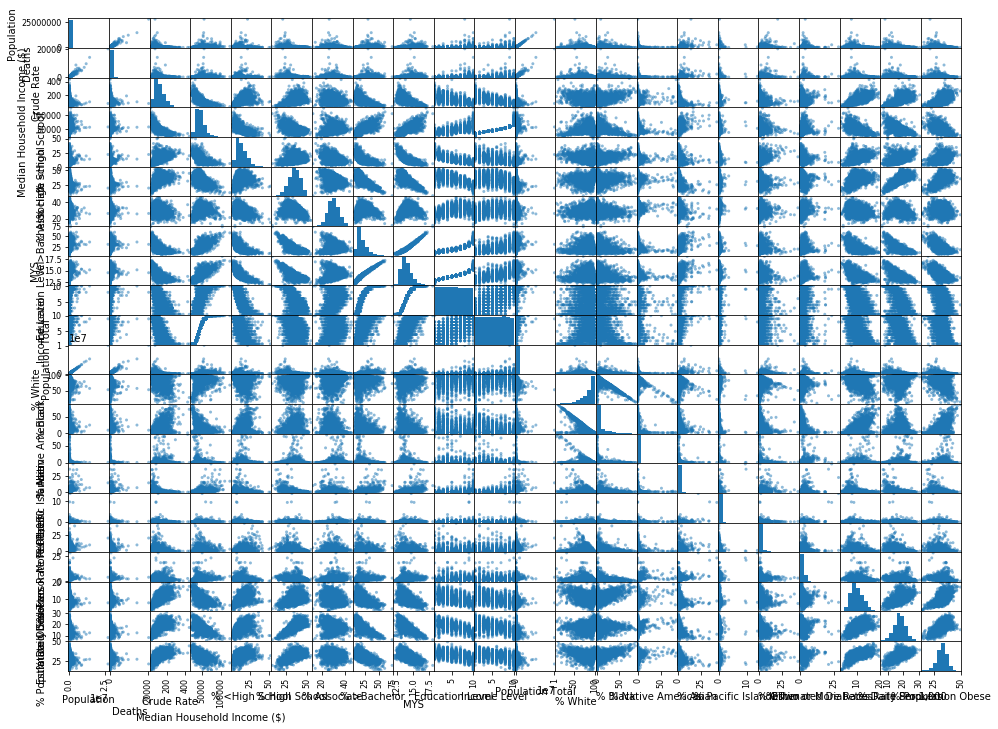

In [15]:
scatter_matrix(df_numeric, figsize=(16,12), alpha = 0.5)

# XGBoost Model

In [18]:
df.columns

Index(['Unnamed: 0', 'FIPS Code', 'County, State', 'Population', 'Deaths',
       'Crude Rate', 'Median Household Income ($)', '% <High School',
       '% High School', '% Associate', '% >Bachelor', 'MYS', 'Education Level',
       'Income Level', 'State', 'County_y', 'Population Total', '% White',
       '% Black', '% Native American', '% Asian', '% Pacific Islander',
       '% Other', '% Two or More Races', 'Estimated Diabetes Rate Per 1,000',
       '% Daily Smokers', '% Population Obese'],
      dtype='object')

In [28]:
df['Crude Rate'].quantile(.9)

196.54999999999995

In [30]:
# Set up data
X = df[['Median Household Income ($)','MYS','% White',
        'Estimated Diabetes Rate Per 1,000',
        '% Daily Smokers','% Population Obese']]

# Make target variable y the top 10% of counties in terms of crude rate
high_crude = df['Crude Rate'] > 196
y = high_crude.astype(int)

In [31]:
# Split data into training and test leaving 20% out
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [32]:
# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [34]:
# Make predictions using test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [35]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.92%
